In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

e = math.e

# The python definition of f(x) for problem 1.

def problem_function(x):
    if (x <= 100):
        return float(-e**(-(x/100)**2))
    else:
        return float(-e**(-1) + (x - 100)*(x - 102))

def derived_problem_function(x):
    if (x <= 100):
        return float(e**(-(x/100)**2)/5000)
    else:
        return float(2*(x - 101))

In [2]:
import os
import sys
import random

# Some definitions for the following variables which will be used in gradient descent.
'''
        df      :   The derived problem function.
        x_0     :   Starting position.
        max_i   :   The maximum amount of iterations.
        step_m  :   The multipler of the step size.
        e_g     :   The tolerance of the gradient.
        e_x     :   The tolerance of the difference in x.
'''

def gradient_descent(df, x_0, max_i, step_m, e_g, e_x, print_workings=False):
    # Set the current x and create a way of storing the previous steps.
    current_x = x_0
    g = df(current_x)
    step_array = []
    
    # Whether to print the workings
    if (print_workings == True):
        print("--------------------------------------------------------------------------------------------\nIteration\tX\tg\tdiff\nStart (0)\t{}\t{}\t{}".format(round(current_x, 2), round(g, 2), "N/A"))
        
    
    # Loop for a maximum of max_i
    for i in range(max_i):
        # Set previous x
        step_array.append(current_x)
        # Find the current x
        current_x = round(current_x - step_m*g, 8)
        # Get a new gradient
        g = round(df(current_x), 8)
        # Find difference in x
        diff = current_x - step_array[i]
        
        # Whether to print the workings
        if (print_workings == True):
            print("{}\t\t{}\t{}\t{}".format(i+1, round(current_x, 2), round(g, 2), round(diff, 2)))
        
        # Check if either of the tolerance conditions are met, if so stop the loop. 
        if (abs(g) < e_g or abs(diff) < e_x):
            break
    
    # Add final x to step_array
    step_array.append(current_x)
    # Return a tuple of all steps and final answer
    return (step_array, current_x)

In [3]:
# Graph the results (data an array of x's)

def plot_problem(f, xrange, data, print_data=False): 
    xs = np.linspace(xrange[0], xrange[1], 2*(xrange[1]-xrange[0]))
    ys = np.array([f(i) for i in xs ])
    
    data_length = len(data)
    s_0 = data[0]
    s_n = data[-1]
    
    xplots = np.array([ round(i, 2) for i in data ])
    yplots = np.array([ round(f(i), 2) for i in data ])
    
    # Work out bounds of graph
    height = (f(xrange[0]), f(xrange[1]))
    width = xrange
    midpoint = ((width[0]+width[1])/2, (height[0]+height[1])/2)

    # MatPlotLib
    
    # Plot the problem line
    plt.title("Problem line (only)")
    plt.plot(xs, ys, '-g', label="f(x)")
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    
    # Plot the results against problem line
    plt.title("Results against problem line")
    line = plt.plot(xs, ys, '-g', label="f(x)")
    
    # Plot array_plottings
    plt.plot(xplots, yplots, "o", color="b", label="Steps")
    
    # Annotate first and last plots
    plt.annotate(s="Start point", xy=(xplots[0], yplots[0]), xytext=(midpoint[0], midpoint[1]+70), arrowprops=dict(arrowstyle='->'))
    plt.annotate(s="Finish point", xy=(xplots[-1], yplots[-1]), xytext=(midpoint[0], midpoint[1]+30), arrowprops=dict(arrowstyle='->'))
    
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    if (print_data == True):
        print("Plot data (2DP)\n_____________________________________\nX")
        for x in range(data):
            print("{}".format(x))

In [4]:
x_0 = 120
max_i = 100
step_m = 0.1
e_g = 0.001
e_x = 0.001

In [5]:
gradient_descent_results = gradient_descent(derived_problem_function, x_0, max_i, step_m, e_g, e_x, True)

--------------------------------------------------------------------------------------------
Iteration	X	g	diff
Start (0)	120	38.0	N/A
1		116.2	30.4	-3.8
2		113.16	24.32	-3.04
3		110.73	19.46	-2.43
4		108.78	15.56	-1.95
5		107.23	12.45	-1.56
6		105.98	9.96	-1.25
7		104.98	7.97	-1.0
8		104.19	6.38	-0.8
9		103.55	5.1	-0.64
10		103.04	4.08	-0.51
11		102.63	3.26	-0.41
12		102.31	2.61	-0.33
13		102.04	2.09	-0.26
14		101.84	1.67	-0.21
15		101.67	1.34	-0.17
16		101.53	1.07	-0.13
17		101.43	0.86	-0.11
18		101.34	0.68	-0.09
19		101.27	0.55	-0.07
20		101.22	0.44	-0.05
21		101.18	0.35	-0.04
22		101.14	0.28	-0.04
23		101.11	0.22	-0.03
24		101.09	0.18	-0.02
25		101.07	0.14	-0.02
26		101.06	0.11	-0.01
27		101.05	0.09	-0.01
28		101.04	0.07	-0.01
29		101.03	0.06	-0.01
30		101.02	0.05	-0.01
31		101.02	0.04	-0.0
32		101.02	0.03	-0.0
33		101.01	0.02	-0.0
34		101.01	0.02	-0.0
35		101.01	0.02	-0.0
36		101.01	0.01	-0.0
37		101.0	0.01	-0.0
38		101.0	0.01	-0.0


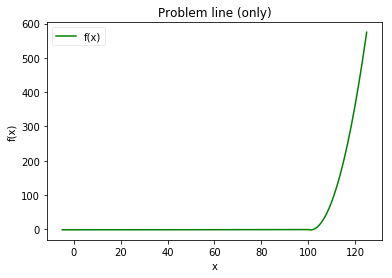

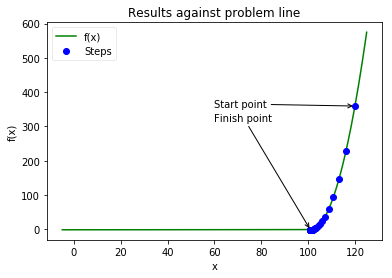

In [6]:
plot_problem(problem_function, (-5, 125), gradient_descent_results[0])

In [16]:
# Imports my plotting module
sys.path.append('../../modules')
import batch_plotting as batch_plt

In [19]:
# Batch test gradient descent with different starting points
starting_point_results = []
for start_x in range(80, 120):
    result = gradient_descent(derived_problem_function, start_x, max_i, step_m, e_g, e_x)
    starting_point_results.append({"x": start_x, "y": result[1]})

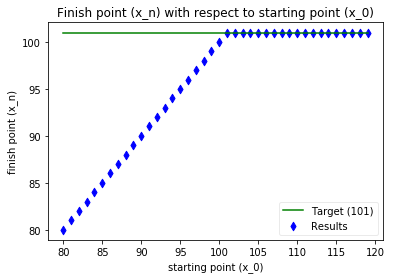

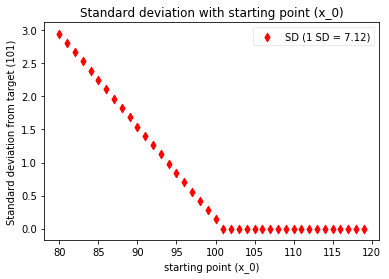

In [23]:
batch_plt.plot_2d_batch_accuracy("finish point (x_n)", "starting point (x_0)", 101, starting_point_results)

Starting at 80


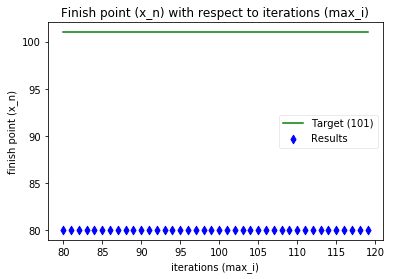

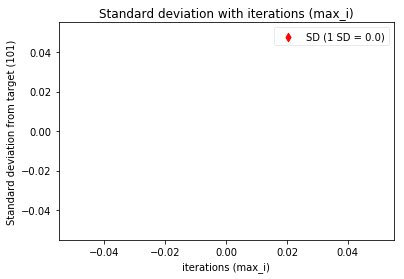

Starting at 101


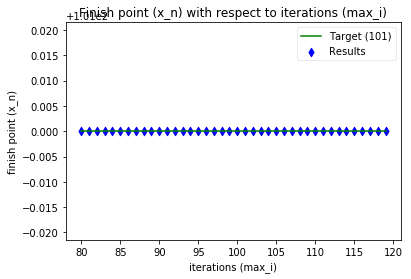

../..\batch_plotting.py:26: RuntimeWarning: invalid value encountered in double_scalars


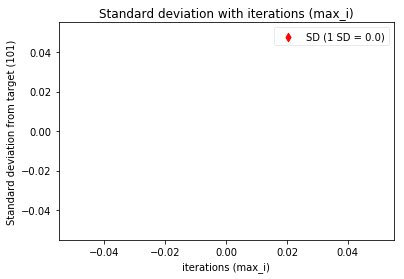

Starting at 120


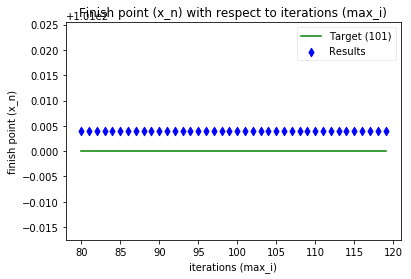

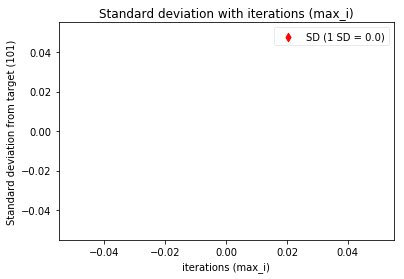

In [24]:
# Batch test gradient descent with different max_iterations
starting_points = [80, 101, 120]
for starting_point in starting_points:
    iteration_results = []
    for max_iter in range(80, 120):
        result = gradient_descent(derived_problem_function, starting_point, max_iter, step_m, e_g, e_x)
        iteration_results.append({"x": max_iter, "y": result[1]})

    print("Starting at {}".format(starting_point))
    batch_plt.plot_2d_batch_accuracy("finish point (x_n)", "iterations (max_i)", 101, iteration_results)

Starting at 80


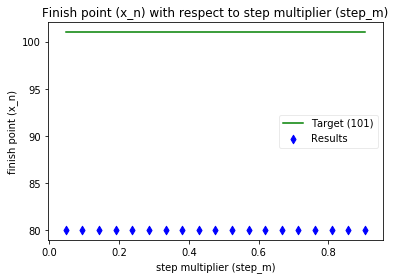

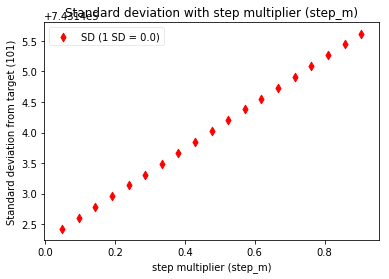

Starting at 101


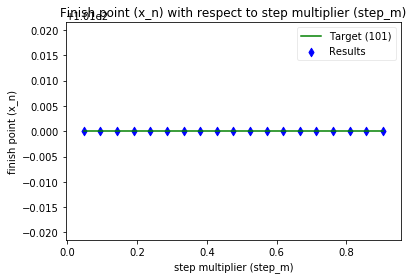

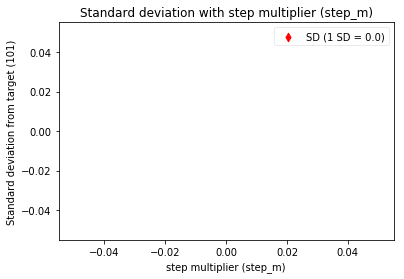

Starting at 120


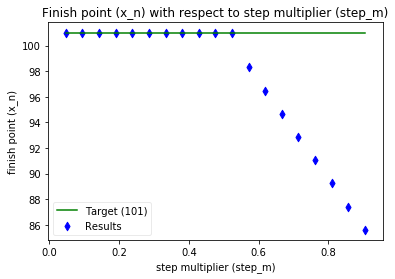

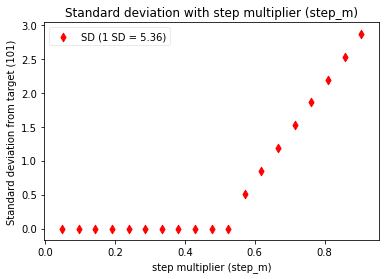

In [33]:
# Batch test gradient descent with different step_multipliers
start_points = [80, 101, 120]
for starting_point in starting_points:
    step_multiplier_results = []
    for s in range(1, 20):
        step_mult = s/21
        result = gradient_descent(derived_problem_function, starting_point, max_i, step_mult, e_g, e_x)
        step_multiplier_results.append({"x": step_mult, "y": result[1]})

    print("Starting at {}".format(starting_point))
    batch_plt.plot_2d_batch_accuracy("finish point (x_n)", "step multiplier (step_m)", 101, step_multiplier_results)

Starting at 80


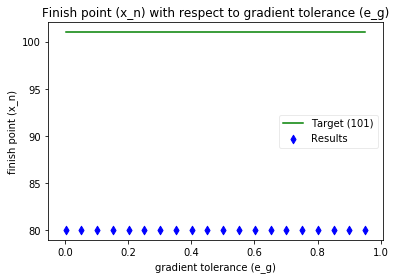

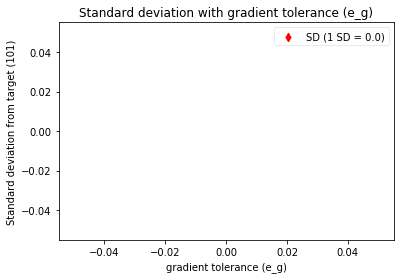

Starting at 101


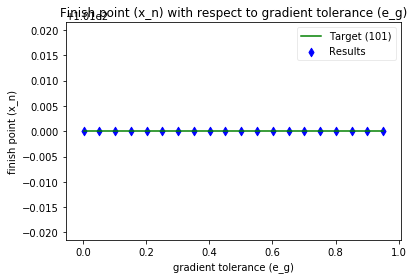

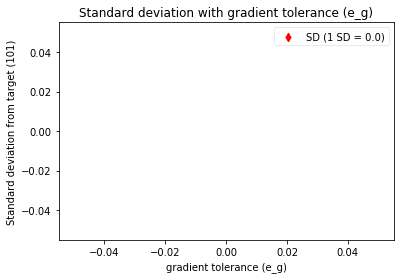

Starting at 120


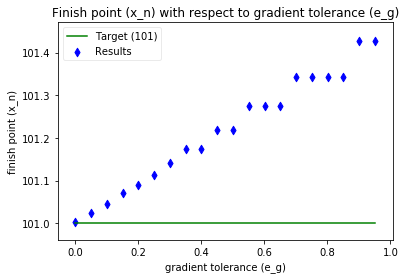

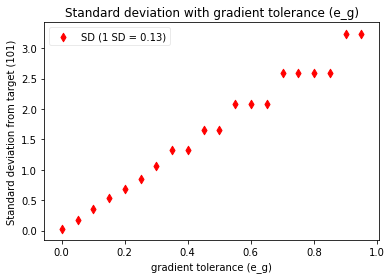

In [35]:
# Batch test gradient descent with different gradient tolerances
start_points = [80, 101, 120]
for starting_point in starting_points:
    e_g_results = []
    for i in range(0, 20):
        e_grad = (50*i+1)/1000
        result = gradient_descent(derived_problem_function, starting_point, max_i, step_m, e_grad, e_x)
        e_g_results.append({"x": e_grad, "y": result[1]})

    print("Starting at {}".format(starting_point))
    batch_plt.plot_2d_batch_accuracy("finish point (x_n)", "gradient tolerance (e_g)", 101, e_g_results)

Starting at 80


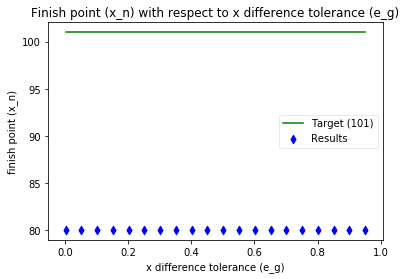

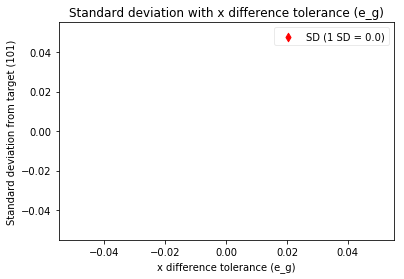

Starting at 101


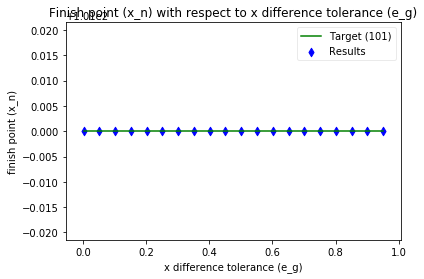

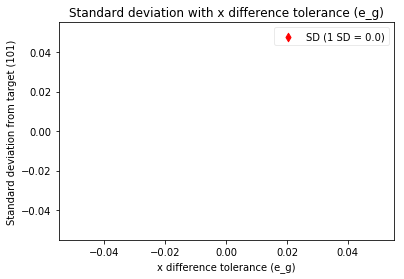

Starting at 120


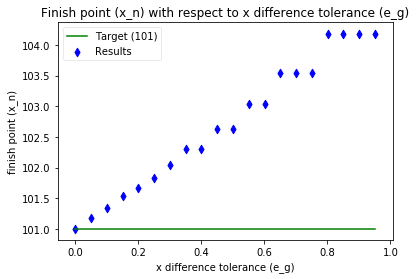

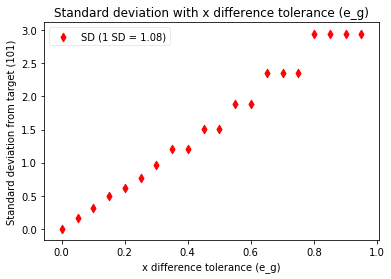

In [37]:
# Batch test gradient descent with different x difference tolerances
start_points = [80, 101, 120]
for starting_point in starting_points:
    e_x_results = []
    for i in range(0, 20):
        e_diffx = (50*i+1)/1000
        result = gradient_descent(derived_problem_function, starting_point, max_i, step_m, e_g, e_diffx)
        e_x_results.append({"x": e_diffx, "y": result[1]})

    print("Starting at {}".format(starting_point))
    batch_plt.plot_2d_batch_accuracy("finish point (x_n)", "x difference tolerance (e_g)", 101, e_x_results)